# Attrition in an Organization || Why Workers Quit?

Employees are the backbone of the organization. Organization's performance is heavily based on the quality of the employees. Challenges that an organization has to face due employee attrition are:

1. Expensive in terms of both money and time to train new employees.
1. Loss of experienced employees
1. Impact in productivity
1. Impact profit

Before getting our hands dirty with the data, first step is to frame the business question. Having clarity on below questions is very crucial because the solution that is being developed will make sense only if we have well stated problem.

### Business questions to brainstorm:
1. What factors are contributing more to employee attrition?
1. What type of measures should the company take in order to retain their employees?
1. What business value does the model bring?
1. Will the model save lots of money?
1. Which business unit faces the attrition problem?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
# df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = pd.read_csv("data/ibm-hr-analytics-attrition-dataset.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1. Exploratory Data Analysis

- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
    - Univariate analysis
        - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
        - Categorical variable : Bar chart showing frequency in each category
    - Bivariate analysis
        - Continous & Continous : Scatter plots to know how continous variables interact with each other
        - Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
        - categorical variables
        - Categorical & Continous : Boxplots, Swamplots or even bar charts
- Detect outliers
- Feature engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [5]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

We notice that '`EmployeeCount`', '`Over18`', '`StandardHours`' have only one unique values and '`EmployeeNumber`' has `1470` unique values.
This features aren't useful for us, So we are going to drop those columns.

In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

## Categorical Features

In [7]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

In [8]:
len(object_col)

7

In [9]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

## Numerical Features

In [10]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')

Attrition : [1 0]
0    1233
1     237
Name: Attrition, dtype: int64
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64
Education : [2 1 4 3 5]
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
EnvironmentSatisfaction : [2 3 4 1]
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
JobInvolvement : [3 2 4 1]
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
JobLevel : [2 1 3 4 5]
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64
JobSatisfaction : [4 2 3 1]
4    459
3    442
1    289
2    280
Name: JobSatisfaction,

In [11]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 25:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
DistanceFromHome : Minimum: 1, Maximum: 29
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


## Data Visualisation

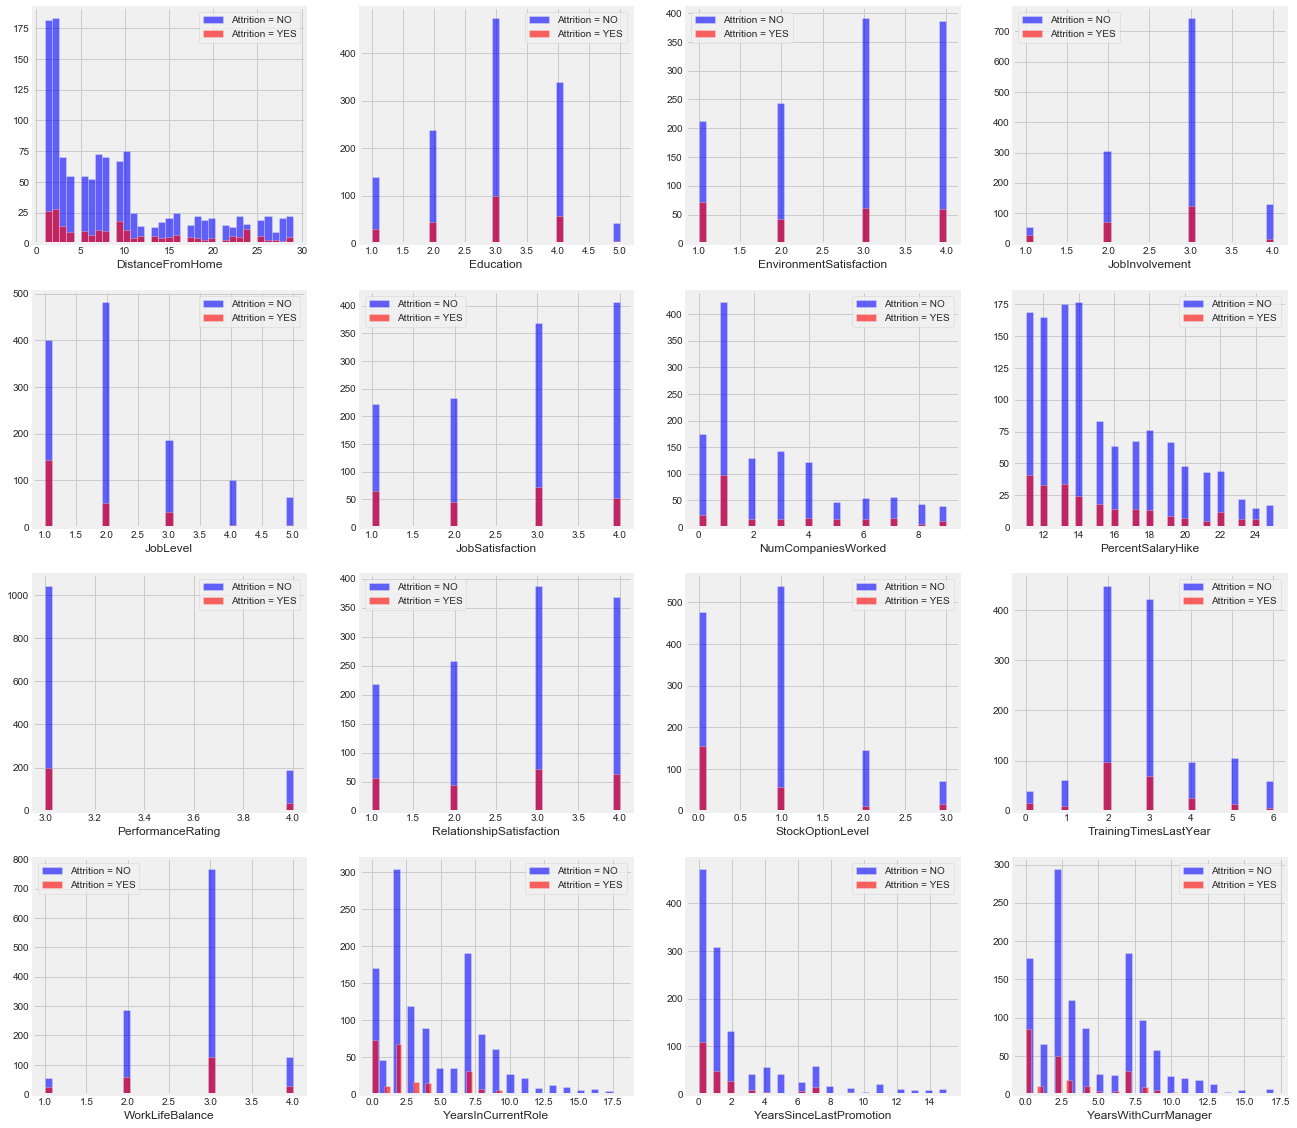

In [12]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

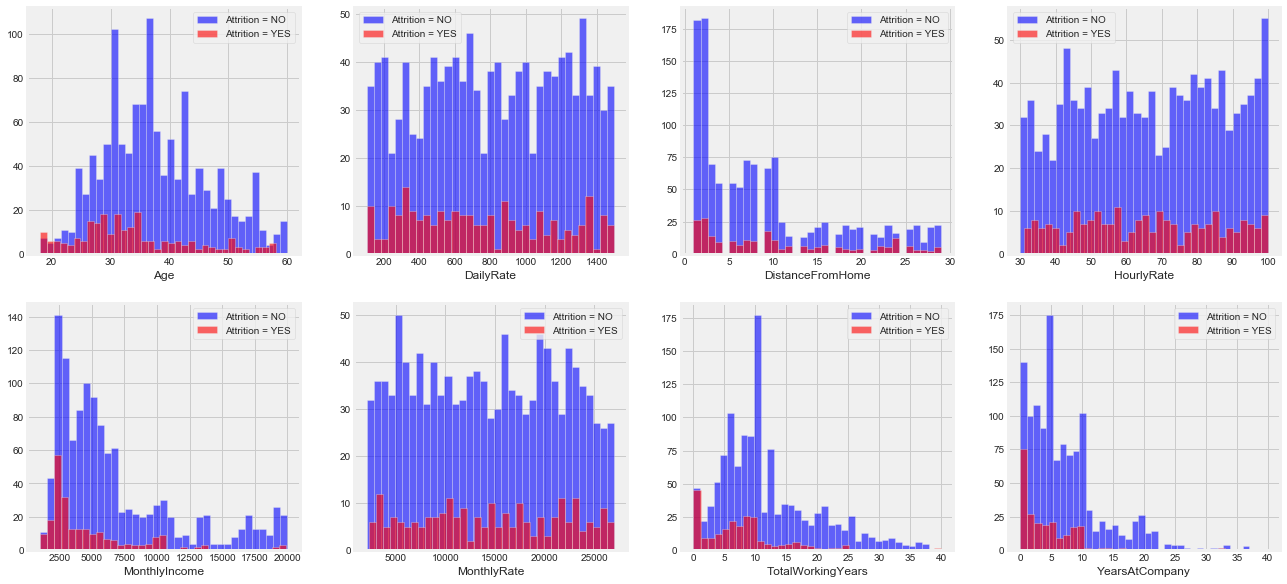

In [13]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

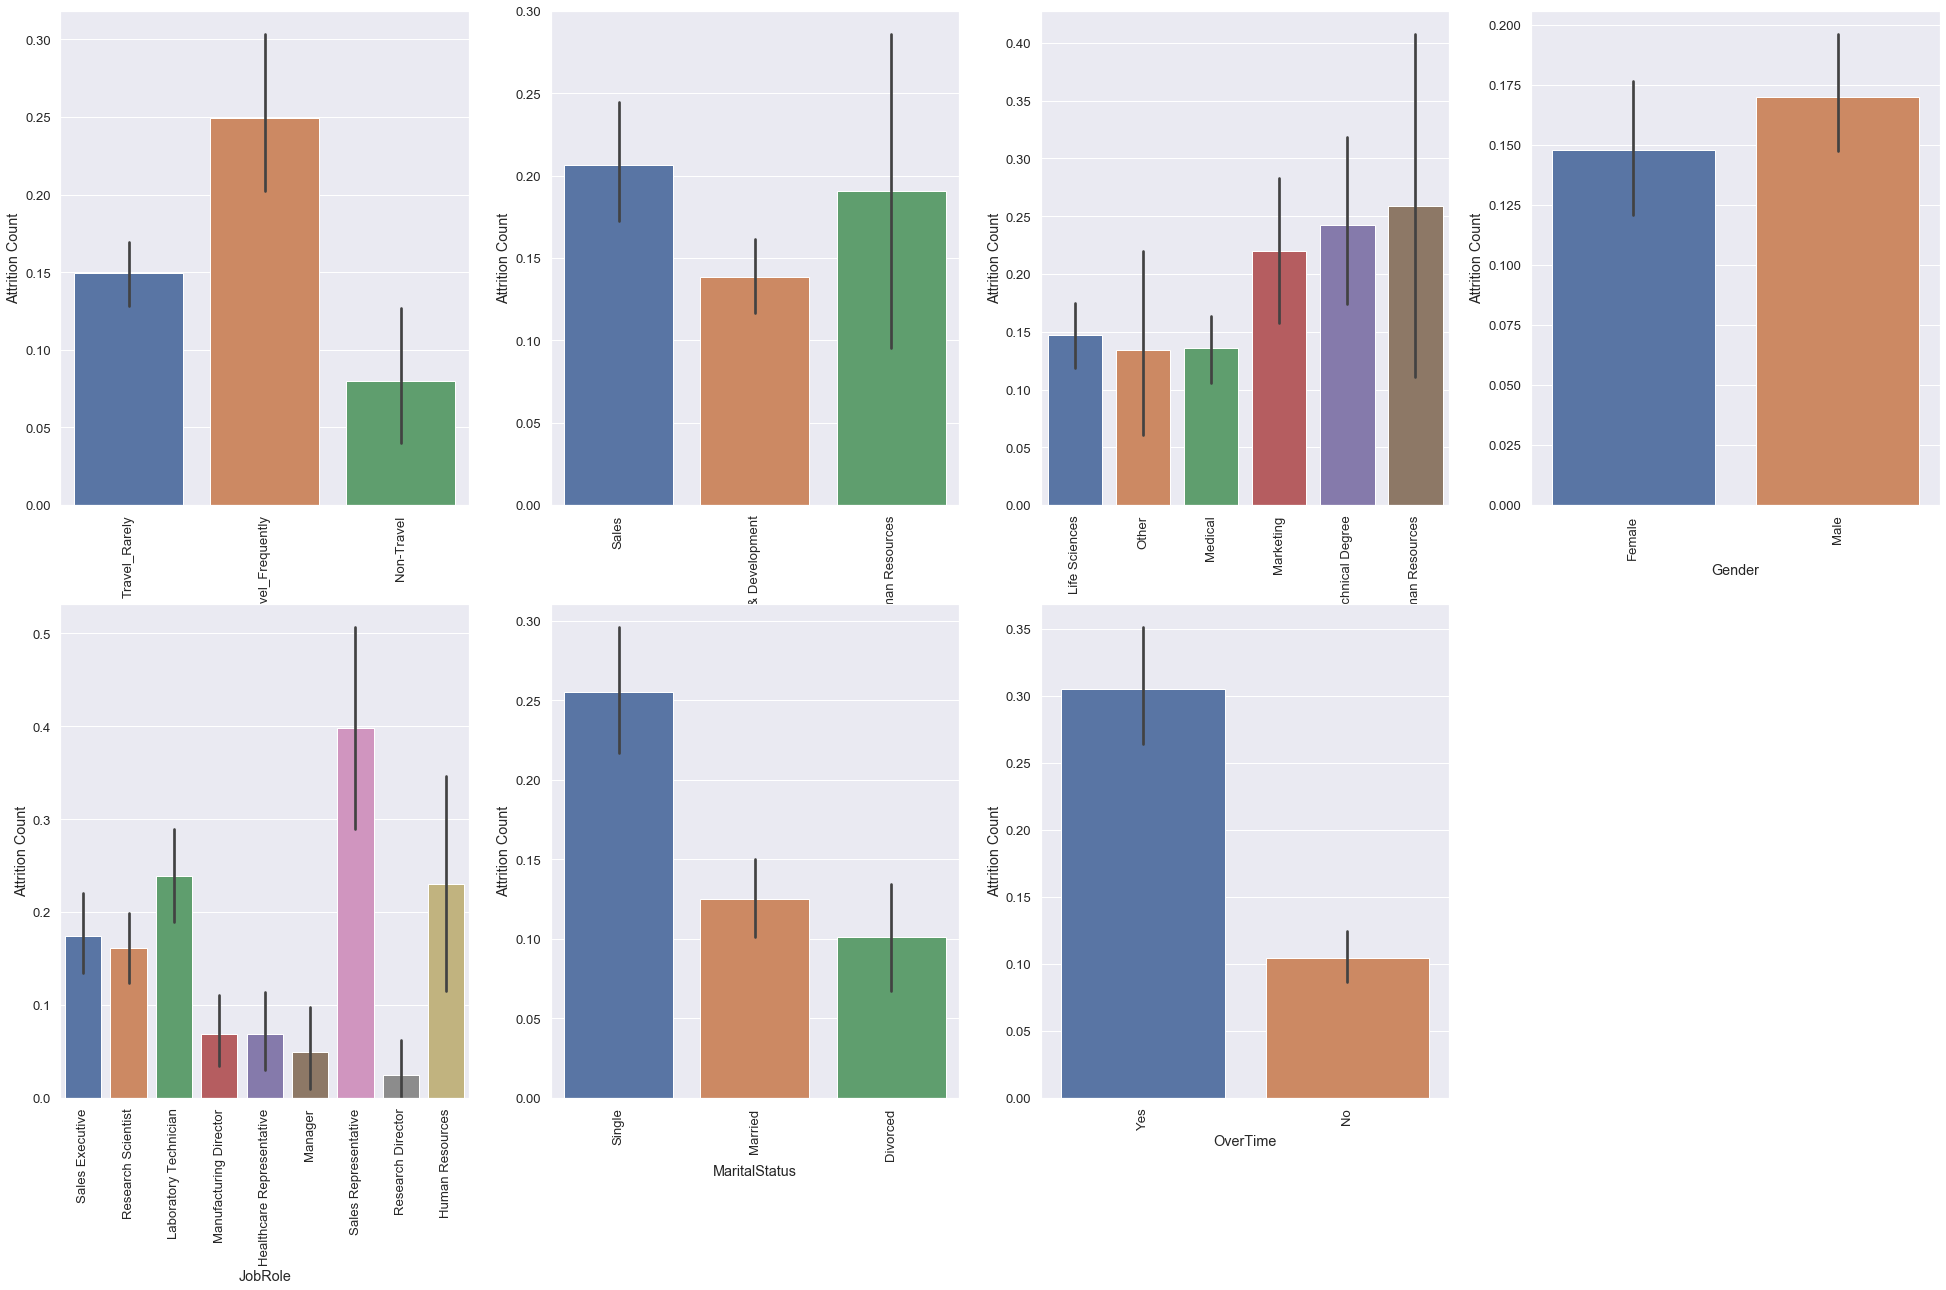

In [14]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 20))


for i, column in enumerate(object_col, 1):
    plt.subplot(2, 4, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

**Conclusions:**

***
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

*** 

# 3. Correlation Matrix

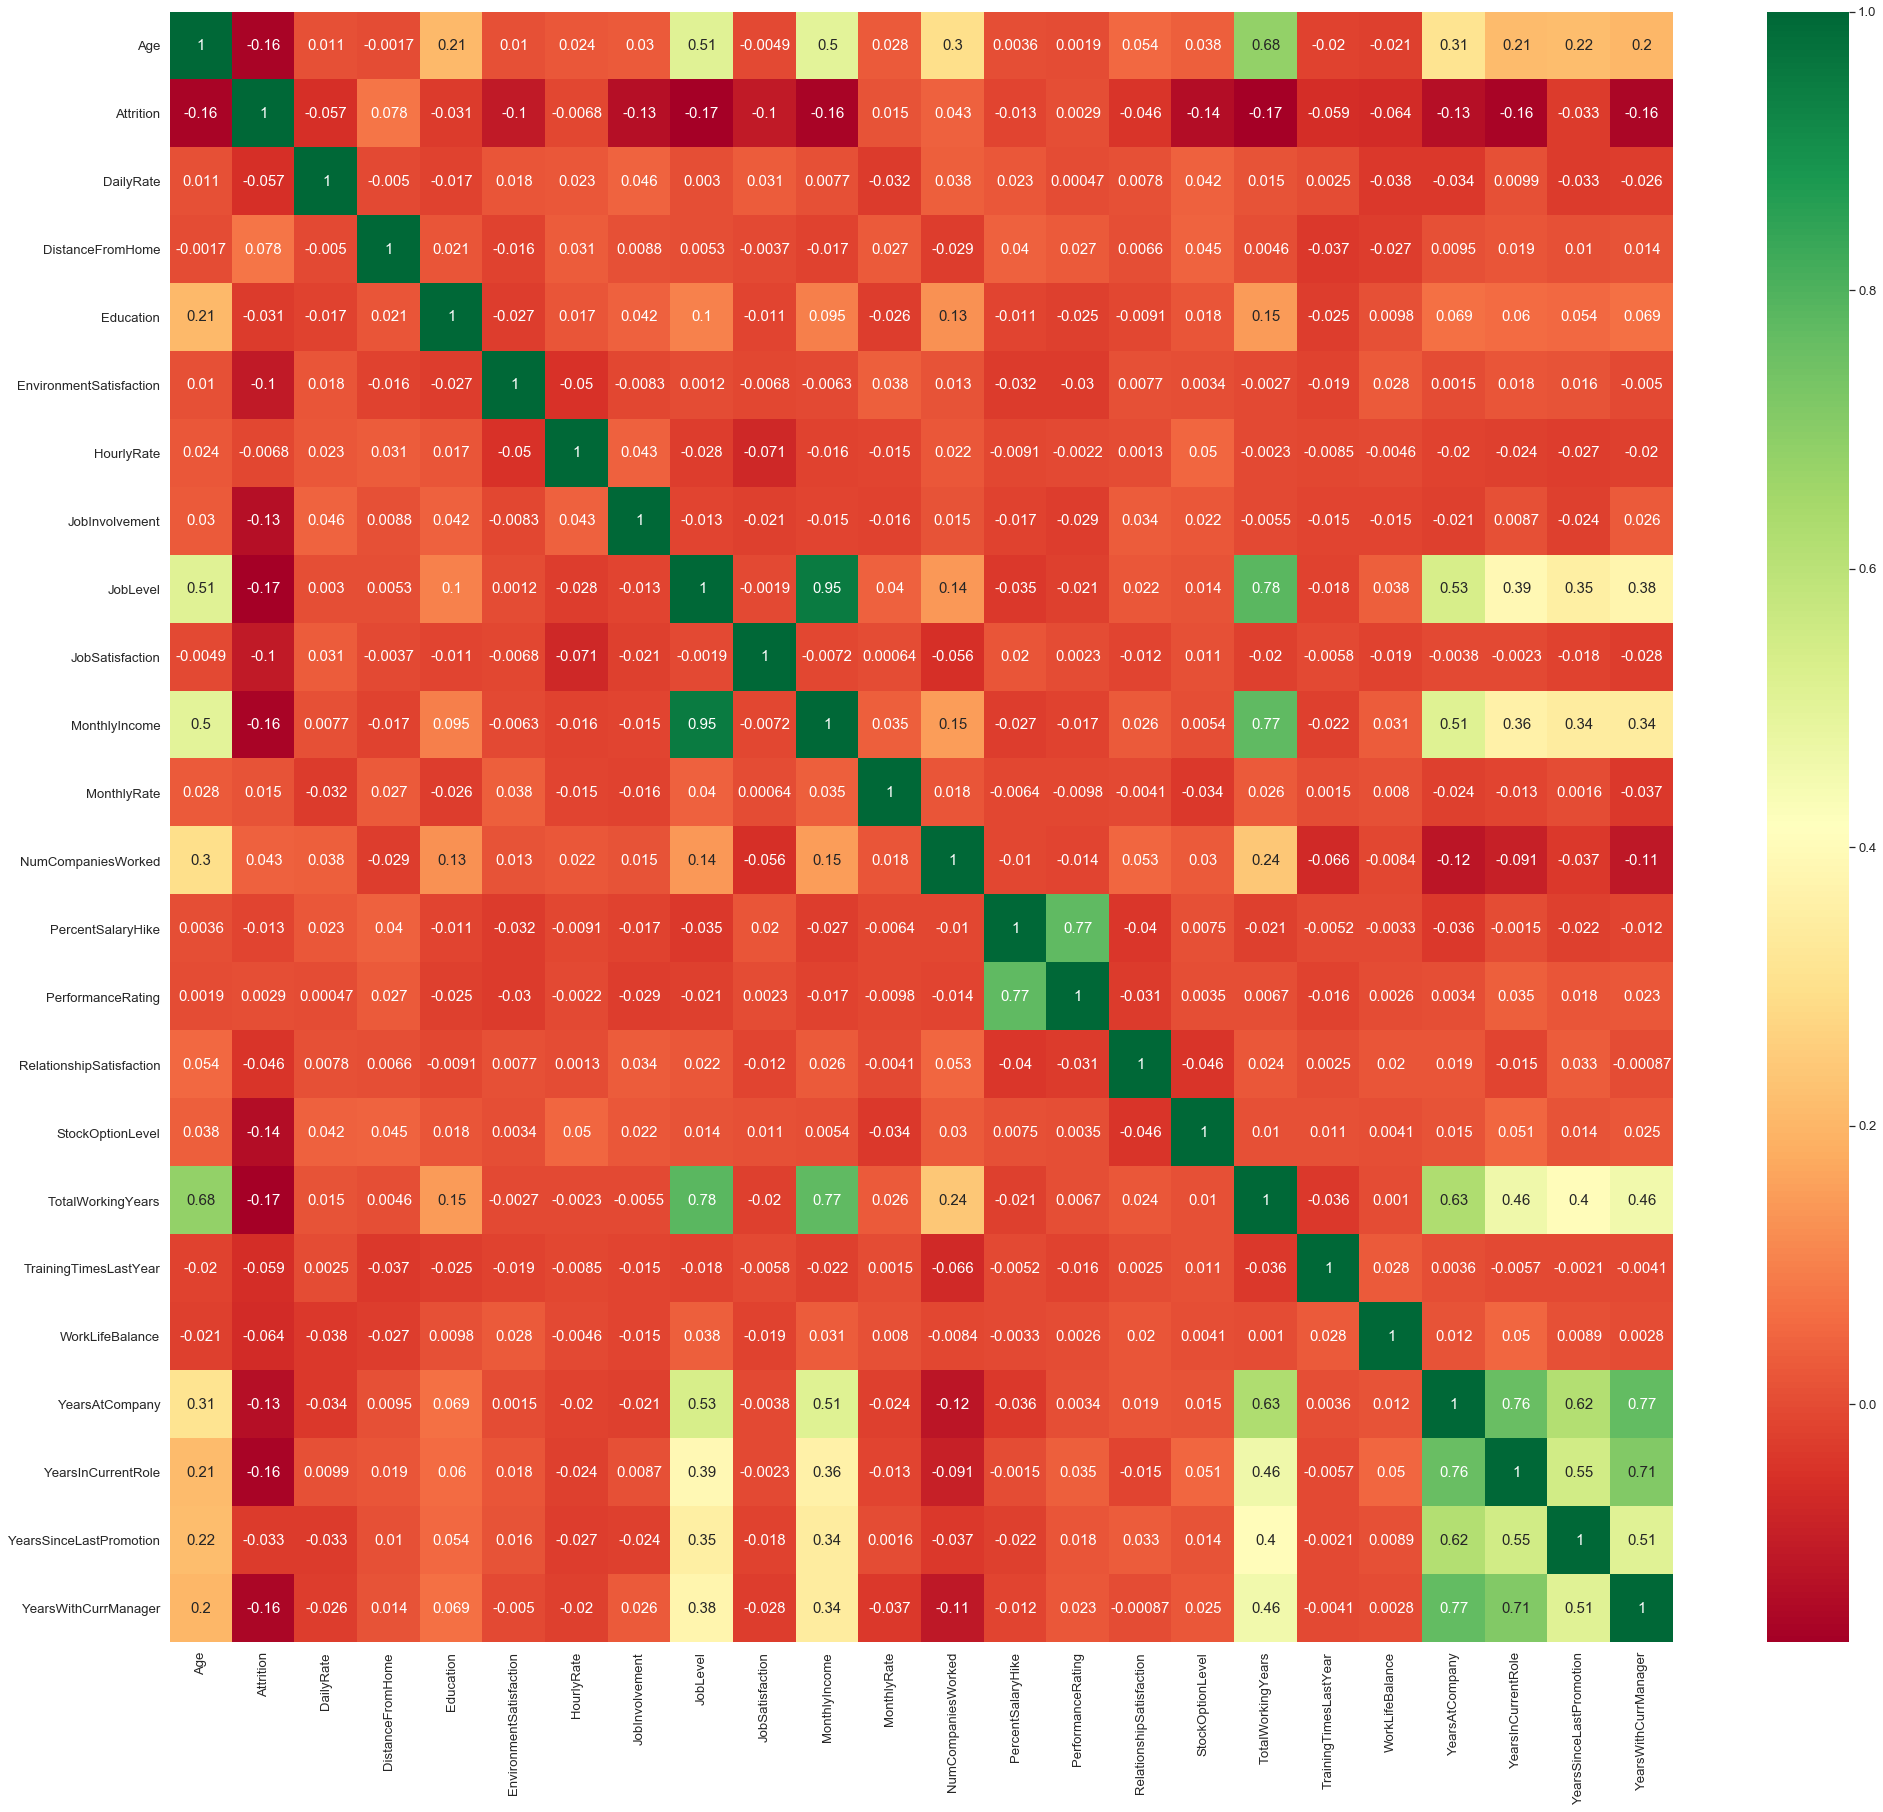

In [15]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

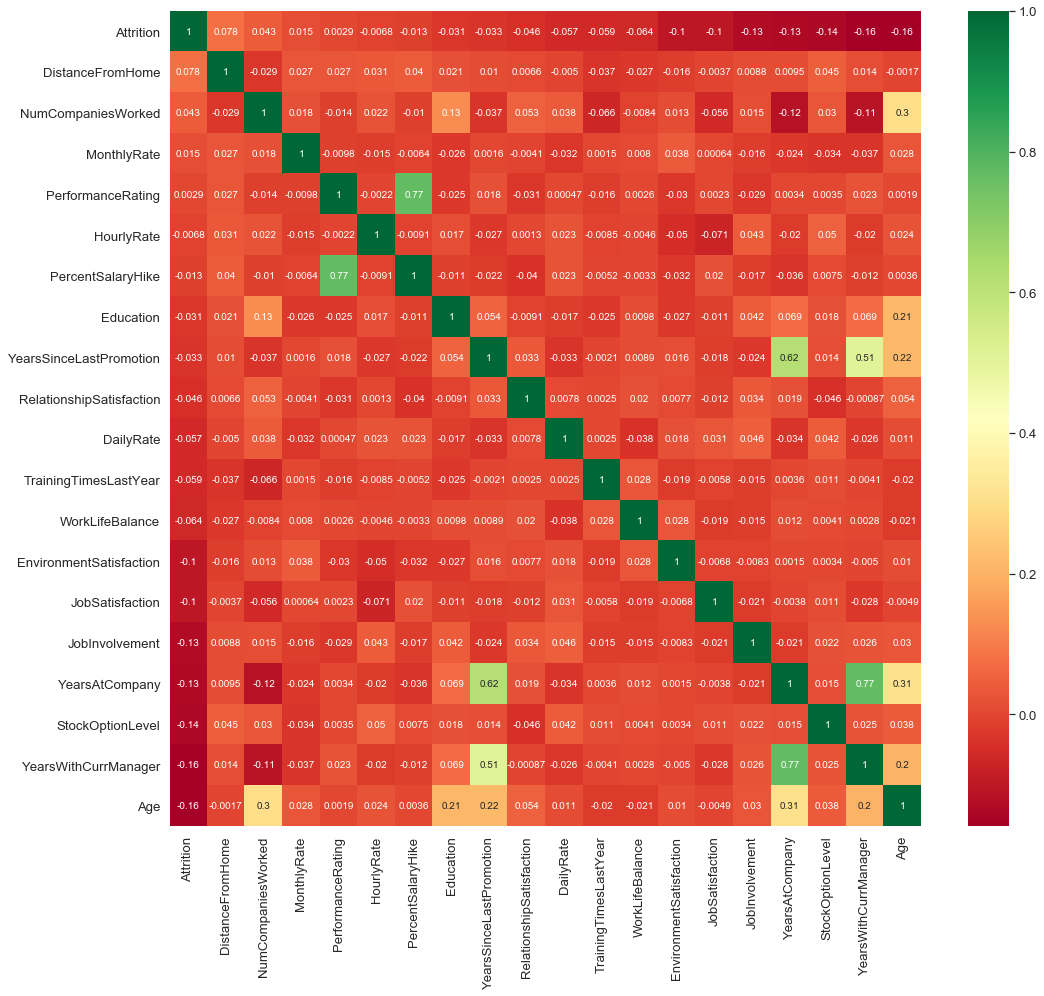

In [16]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

**Analysis of correlation results (sample analysis):**
- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.
- Marital status and stock option level are negatively correlated

# 4. Data Processing

In [17]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()

In [18]:
for column in object_col:
    df[column] = label.fit_transform(df[column])

In [19]:
df.shape

(1470, 31)

In [20]:
col_2 = df.corr().nlargest(20, "Attrition").Attrition.index
print(col_2)

Index(['Attrition', 'OverTime', 'MaritalStatus', 'DistanceFromHome', 'JobRole',
       'Department', 'NumCompaniesWorked', 'Gender', 'EducationField',
       'MonthlyRate', 'PerformanceRating', 'BusinessTravel', 'HourlyRate',
       'PercentSalaryHike', 'Education', 'YearsSinceLastPromotion',
       'RelationshipSatisfaction', 'DailyRate', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')


# 5. Applying machine learning algorithms

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 5. 1. Decision Tree Classifier

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20)), 
          }

X = df[col_2].drop("Attrition", axis="columns")
y = df.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

In [23]:
# grid_search_cv.fit(X_train, y_train)

In [24]:
# grid_search_cv.best_estimator_

In [25]:
tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='random')

In [26]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=14, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='random')

In [27]:
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8377

Classification Report: 
 	Precision: 0.5420560747663551
	Recall Score: 0.32954545454545453
	F1 score: 0.4098939929328622

Confusion Matrix: 
 [[804  49]
 [118  58]]

Test Result:
accuracy score: 0.8390022675736961

Classification Report: 
 	Precision: 0.35294117647058826
	Recall Score: 0.19672131147540983
	F1 score: 0.2526315789473684

Confusion Matrix: 
 [[358  22]
 [ 49  12]]



## 5. 2. Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth':[3, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 
              'bootstrap':[True, False],
              'n_estimators':[100, 500, 1000, 1500],
              'criterion':["gini", "entropy"]}

rand_frst_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

grid_rand_forest = GridSearchCV(rand_frst_clf, param_grid, scoring="accuracy", 
                                n_jobs=-1, verbose=1, cv=3, iid=True)

In [29]:
# grid_rand_forest.fit(X_train, y_train)

In [30]:
# grid_rand_forest.best_estimator_

In [31]:
rand_forest = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9903

Classification Report: 
 	Precision: 1.0
	Recall Score: 0.9431818181818182
	F1 score: 0.9707602339181286

Confusion Matrix: 
 [[853   0]
 [ 10 166]]

Test Result:
accuracy score: 0.8684807256235828

Classification Report: 
 	Precision: 0.6363636363636364
	Recall Score: 0.11475409836065574
	F1 score: 0.19444444444444445

Confusion Matrix: 
 [[376   4]
 [ 54   7]]



## 5. 3. XGBoost Classifier

In [34]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

n_estimators = [50, 100, 150, 200]
max_depth = [2, 3, 5]
booster = ['gbtree', 'gblinear']
base_score = [0.2, 0.25, 0.5, 0.75]
learning_rate = [0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 
                       'max_depth': max_depth, 
                       'learning_rate' : learning_rate, 
                       'min_child_weight' : min_child_weight,
                       'booster' : booster, 
                       'base_score' : base_score}

xgb_grid_search_cv = GridSearchCV(xgb_model, hyperparameter_grid, scoring="roc_auc", 
                                  n_jobs=-1, verbose=1, cv=3, iid=True)

In [35]:
# xgb_grid_search_cv.fit(X_train, y_train)

In [36]:
# xgb_grid_search_cv.best_estimator_

In [37]:
xgb = XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.8960

Classification Report: 
 	Precision: 0.9058823529411765
	Recall Score: 0.4375
	F1 score: 0.5900383141762452

Confusion Matrix: 
 [[845   8]
 [ 99  77]]

Test Result:
accuracy score: 0.8662131519274376

Classification Report: 
 	Precision: 0.5454545454545454
	Recall Score: 0.19672131147540983
	F1 score: 0.2891566265060241

Confusion Matrix: 
 [[370  10]
 [ 49  12]]



## 5. 4. Balance the dataset

In [39]:
print(df.Attrition.value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


In [40]:
from sklearn.utils import resample

minority_class = df[df.Attrition == 1]
majority_class = df[df.Attrition == 0]

majority_downsample = resample(majority_class, replace=False,     # sample with replacement
                               n_samples=237,    # to match minority class
                               random_state=42) 

data_2 = pd.concat([majority_downsample, minority_class])

data_2.Attrition.value_counts()

1    237
0    237
Name: Attrition, dtype: int64

In [41]:
X = data_2.drop("Attrition", axis="columns")
y = data_2.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

n_estimators = [100, 150, 200]
max_depth = [2, 3, 5]
booster = ['gbtree', 'gblinear']
base_score = [0.2, 0.25, 0.5, 0.75, 0.99]
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

hyperparameter_grid = {'n_estimators': n_estimators, 
                       'max_depth': max_depth, 
                       'learning_rate' : learning_rate, 
                       'min_child_weight' : min_child_weight,
                       'booster' : booster, 
                       'base_score' : base_score}

xgb_grid_search_cv = GridSearchCV(xgb_model, hyperparameter_grid, scoring="accuracy", 
                                  n_jobs=-1, verbose=1, cv=3, iid=True)

In [43]:
# xgb_grid_search_cv.fit(X_train, y_train)

In [44]:
# xgb_grid_search_cv.best_estimator_

In [45]:
xgb = XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.15, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.15, max_delta_step=0, max_depth=2,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [46]:
print_score(xgb, X_train, y_train, X_test, y_test, train=True)
print_score(xgb, X_train, y_train, X_test, y_test, train=False)

Train Result:
accuracy score: 0.9245

Classification Report: 
 	Precision: 0.9329268292682927
	Recall Score: 0.9161676646706587
	F1 score: 0.9244712990936556

Confusion Matrix: 
 [[153  11]
 [ 14 153]]

Test Result:
accuracy score: 0.6713286713286714

Classification Report: 
 	Precision: 0.6533333333333333
	Recall Score: 0.7
	F1 score: 0.6758620689655173

Confusion Matrix: 
 [[47 26]
 [21 49]]



| Classifier | SVM | Decision Tree | Bagging | Random Forest | Extra-Trees | AdaBoost | Gradient Boosting |
|:-|:-|:- |:- |:- |:- |:-|:-| 
| Train accuracy score | 0.9008 | 0.8717 | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 0.9611 |
| Test accuracy score | 0.8888 | 0.8571 | 0.8662 | 0.8662 | 0.8730 | 0.8639 | 0.8752 |


[GitHub Notebook](https://github.com/IBM/employee-attrition-aif360/blob/master/notebooks/employee-attrition.ipynb)